Import The Libreries

In [3]:
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Plot Style

In [ ]:
plt.style.use("fivethirtyeight")

Functions

Visualize DataSet

In [ ]:
def visualize_dataSet(url_data):
    # visualize the closing price
    df = pd.read_csv(url_data)
    plt.figure(figsize=(16, 8))
    plt.title("Close Price History")
    plt.plot(df["Close"],"green")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Close Price", fontsize=12)
    plt.show()

Get The DataSet

In [25]:
def get_data_set(url_data):
    # get data
    df = pd.read_csv(url_data,index_col="Date")
    
    return df

Get Number Of Train Data

In [32]:
def get_number_train(data_set,prs):

    # the number of rows to train model
    len_data_train = math.ceil(len(data_set)*prs)
    return len_data_train

Create Train (x,y) Data

In [5]:
def create_train_data(scaled_data, len_data_train):

    # create the training data
    train_data = scaled_data[0:len_data_train, :]

    # split the train data
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # convert the data to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train

Create Test (x,y) Data

In [6]:
def create_test_data(scaled_data, data_set, len_data_train):
    # create the data test
    test_data = scaled_data[len_data_train-60:, :]

    # create x_test & y_test
    x_test = []
    y_test = data_set[len_data_train:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    # convert the data to a numpy array
    x_test = np.array(x_test)

    # reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_test, y_test

Build And Train LSTM Model

In [8]:
def build_and_train_lstm_model(x_train, y_train):
    # Build the LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True,
              input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the Model
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Train the model
    model.fit(x_train, y_train, epochs=5)

    return model

Plotting Train & Test & Prediction Data

In [1]:
def plotting(prediction, y_test, len_data_train, url_data):

    df = pd.read_csv(url_data)
    data_close = df.filter(['Close'])

    # plot the data
    train = data_close[:len_data_train]
    actual = data_close[len_data_train:]
    actual['Prediction'] = prediction
    plt.figure(figsize=(12, 6))
    plt.title("Model Lstm")
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Close", fontsize=14)
    plt.plot(train['Close'],"green")
    plt.plot(actual[['Close', 'Prediction']])
    plt.legend(["Train", "Test", "Pred"], loc="lower right")
    plt.show()

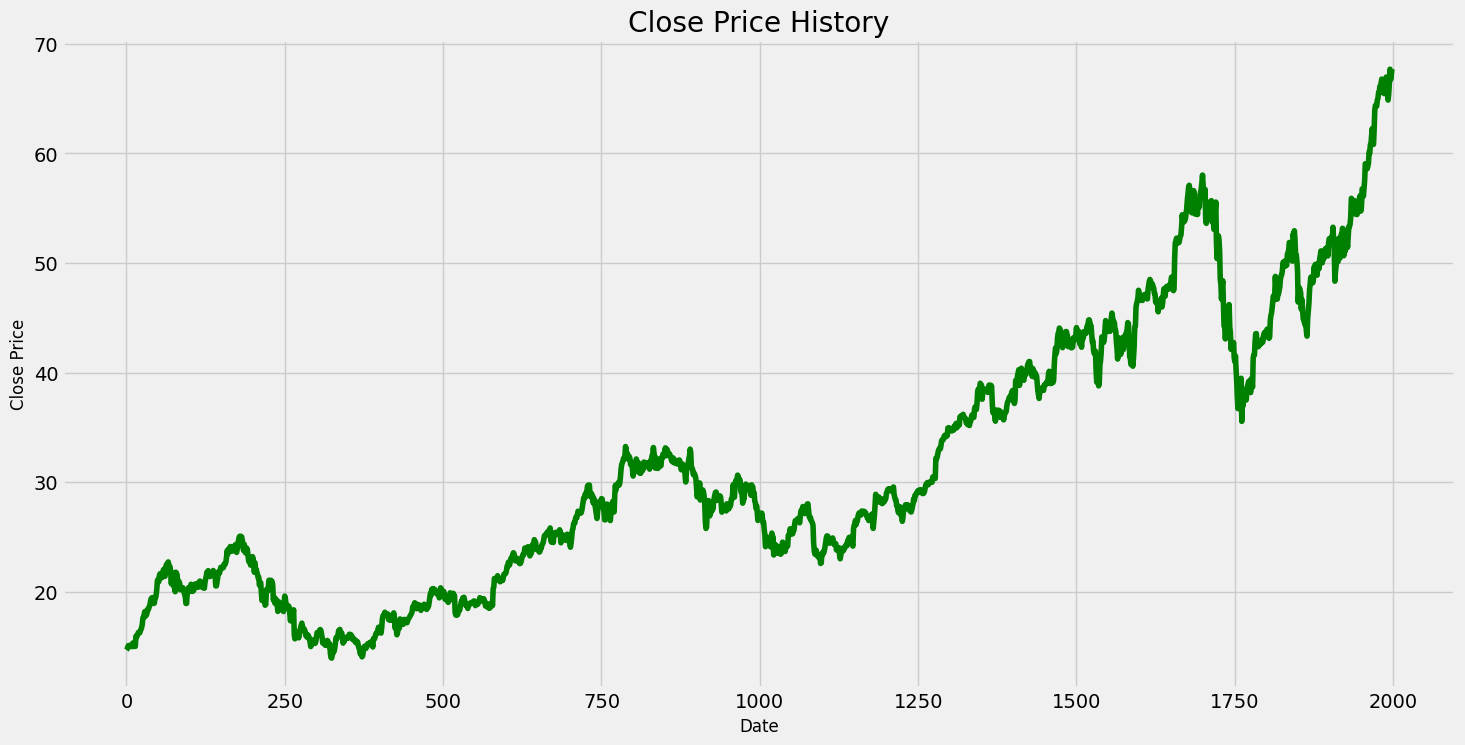

In [61]:
# visualize_dataSete
visualize_dataSet('./AAPL (1).csv')

In [53]:
# get the data_set
df = get_data_set('./AAPL (1).csv')
# df

In [54]:
# create a new dataframe with only the Close column
data_close = df.filter(['Close'])
# conver the dataframe to a numpy array
dataset = data_close.values
# data_close.head(10)

In [37]:
# the number of rows to train model
len_data_train = get_number_train(dataset,.75)
len_data_train

1500

In [40]:
# create the training data
scaler = MinMaxScaler()
scalerData = scaler.fit_transform(dataset)
train_data = scalerData[:len_data_train, :]
# train_data

In [45]:
# get the x_train & y_train & x_test & y_test
(x_train, y_train) = create_train_data(scalerData, len_data_train)
(x_test, y_test) = create_test_data(scalerData, dataset, len_data_train)
# x_train.shape
# y_train.shape


In [48]:
# build and train the model
model_lstm = build_and_train_lstm_model(x_train, y_train)

Epoch 1/5
45/45 [==============================] - 22s 158ms/step - loss: 0.0043
Epoch 2/5
45/45 [==============================] - 8s 188ms/step - loss: 3.4860e-04
Epoch 3/5
45/45 [==============================] - 10s 209ms/step - loss: 3.2327e-04
Epoch 4/5
45/45 [==============================] - 8s 182ms/step - loss: 3.1134e-04
Epoch 5/5
45/45 [==============================] - 9s 189ms/step - loss: 2.9157e-04


In [51]:
# Prodection the data values
prediction = model_lstm.predict(x_test)
prediction = scaler.inverse_transform(prediction)
# prediction

16/16 [==============================] - 1s 75ms/step


In [2]:
plotting(prediction, y_test, len_data_train, "./AAPL (1).csv")

NameError: name 'prediction' is not defined